<div align="center">
    <h3>Universidad Tecnológica de Panamá <br/>Campus Victor Levi Sasso<br/>Facultad de Ingeniería en Sistemas Computacionales<br/>Licenciatura en Ingeniería en Sistemas y Computación<br/>Tópicos Especiales I - Visión Artificial</h3>
    <h3>Taller 2 - Feature Matching</h3>
</div>

**Asignatura:** Tópicos Especiales - Visión Artificial 

**Código:** 0756

**Profesor:** Edmanuel Cruz

**Estudiante:** Ricardo Cuan 8-941-913

## Objetivos

* Se verá cómo hacer coincidir los rasgos de una imagen con los de otras.
* Se usará el Brute-Force Matcher y el FLANN Matcher en OpenCV. 

<div align="center">
    <h1>Introducción</h1>
</div>

### Brute-Force Matcher 

La coincidencia de Fuerza Bruta es simple. Toma el descriptor de un rasgo en el primer conjunto y se
compara con todos los otros rasgos en el segundo conjunto usando algún cálculo de distancia. Y el más
cercano es devuelto.

En este laboratorio se tocarán tres algoritmos que tocan esta característica:
    
1. Brute-Force Matching con Descriptores ORB 
2. Brute-Force Matching con descriptores SIFT y prueba de proporción 
3. Matcher basado en FLANN 

Se utilizará el lenguaje Python y el framework de Jupyter Notebook para realizar los experimentos.

<div align="center">
    <h1>Resultados</h1>
</div>

### Imagenes a utilizar

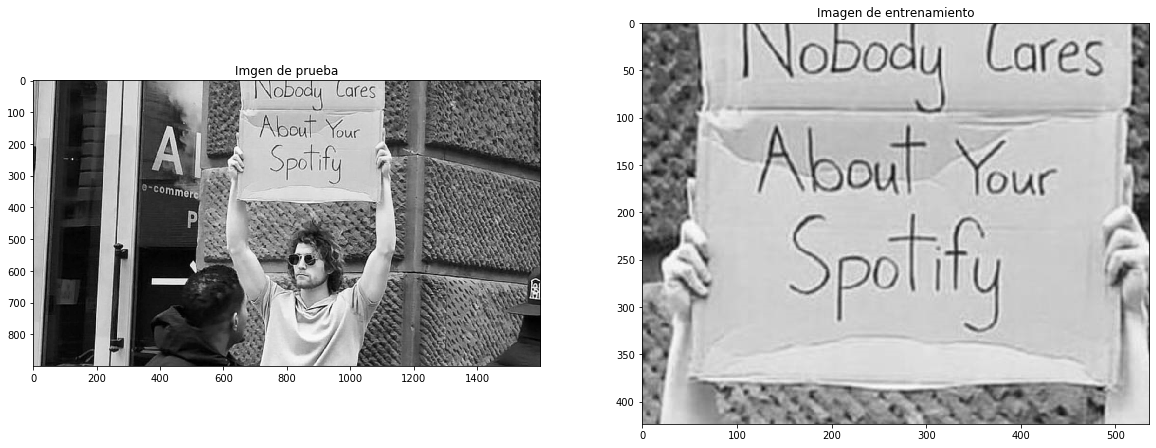

In [9]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

# Lectura de imágenes
img1 = cv.imread('img1.jpg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('img2.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Imagenes a RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Mostrar la imagen de entrenamiento y la imagen de prueba
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Imgen de prueba")
imagen1 = plots[0].imshow(img1)

plots[1].set_title("Imagen de entrenamiento")
imagen2 = plots[1].imshow(img2)

### Brute-Force Matching con Descriptores ORB 

Aquí, veremos un simple ejemplo de cómo hacer coincidir las características entre dos imágenes. En este
caso, tengo una imagen de consulta y una imagen de entrenamiento. Intentaremos encontrar la una
imagen de consulta en la imagen de entrenamiento usando la coincidencia de características.

Estamos usando descriptores de ORB para comparar las características. Así que empecemos con la carga
de imágenes, la búsqueda de descriptores, etc. 

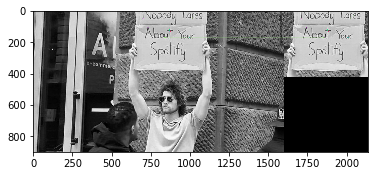

(<matplotlib.image.AxesImage at 0x22ad0bbd608>, None)

In [1]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 

# Letura de imágenes
img1 = cv.imread('img1.jpg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('img2.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance) 

# Draw first 10 matches. 
img3 = cv.drawMatches(img1, kp1, img2, kp2,matches[:10], None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### Brute-Force Matching con descriptores SIFT y prueba de proporción 


Esta vez, usaremos BFMatcher.knnMatch() para obtener las mejores coincidencias. En este ejemplo,
tomaremos k=2 para poder aplicar la prueba de proporción explicada por D.Lowe en su trabajo. 

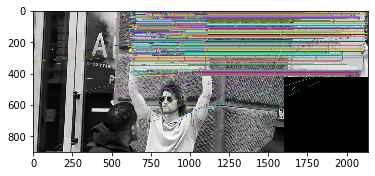

(<matplotlib.image.AxesImage at 0x22ad0d31fc8>, None)

In [2]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('img1.jpg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('img2.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector 
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None) 
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params 
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test 
good = [] 
for m,n in matches: 
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches. 
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show() 

### Matcher basado en FLANN 

FLANN significa Librería Rápida para Vecinos Cercanos Aproximados, viene del inglés Fast Library for
Approximate Nearest Neighbors. 

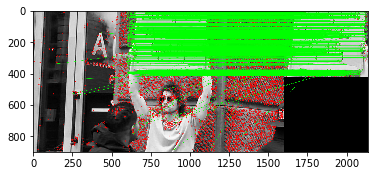

(<matplotlib.image.AxesImage at 0x22ad0576988>, None)

In [3]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('img1.jpg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('img2.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector 
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None) 
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters 
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

# or pass empty dictionary
search_params = dict(checks=50) 
flann = cv.FlannBasedMatcher(index_params,search_params)

# Need to draw only good matches, so create a mask
matches = flann.knnMatch(des1,des2,k=2)
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper 
for i,(m,n) in enumerate(matches): 
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

<div align="center">
    <h1>Conclusiones</h1>
</div>

Featuring Matching es un método eficaz para detectar objetivo específicos en una escena desordenada. Este método detecta objetos individuales en imágnes con mucho contenido.

Con este taller se pudieron cumplir con los objetivos trazados desde un inicio, ya que sepude ver cómo hacer coincidir los rasgos de una imagen con los de otras y se usó el Brute-Force Matcher y el FLANN Matcher en OpenCV, obteniendo resultados exitosos utilizando una imagen propia.

Las conclusiones de los resultados fueron que los algoritmos tienen muchas similitudes, pero cada uno necesita de distintos requisitos, por lo que cada algoritmo difieren a cierto grado.

<div align="center">
    <h1>Referencias</h1>
</div>

[1] OpenCV, «OpenCV: Feature Matching,» 2020. [En línea]. Available:
https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html. 

[2] L. Shimiao , «A review of feature detection and match algorithms for localization and mapping,» de IOP
Conference Series: Materials Science and Engineering, 2017. 